In [2]:
##https://sqlzoo.net/wiki/SELECT_basics
partition ,execution, nested ,multiple table(join where group like),query memory space takes,date time day week seconds



- SELECT population FROM world WHERE area = (SELECT max(area) from world)
146000000	17125242

- SELECT name, MAX(area) as salary FROM world GROUP BY name

- SELECT population , area FROM world order by area desc
146000000	17125242
35427524	9984670
318320000	9826675

- SELECT TOP 1  population , area FROM world WHERE area < (SELECT max(area) from world) order by area desc
2nd max 35427524	9984670

- SELECT TOP 1  population , area FROM world WHERE area < (SELECT max(area) from world where area <(SELECT max(area) from world )) order by area desc
3rd max
population	area
318320000	9826675

- SELECT population , area FROM world WHERE area  between 1000 and 10000
 population area in betwee 1000 - 1000
 
- SELECT continent, max(area) from world group by  continent
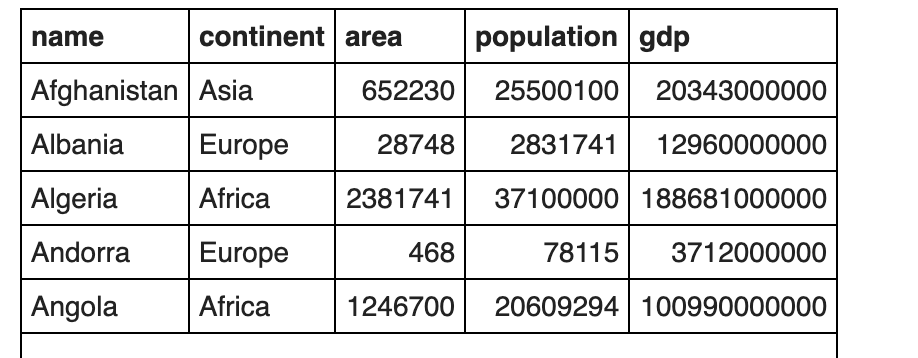

- SELECT continent, min(area) from world group by  continent

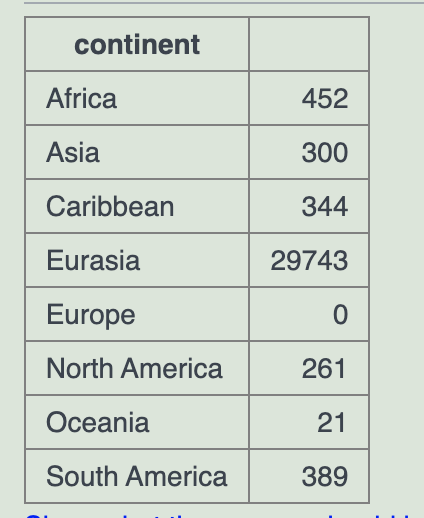

the good news is that if you need to make a case-sensitive query, it is very easy to do using the BINARY operator, which forces a byte by byte comparison:

SELECT * FROM `table` WHERE BINARY `column` = 'value'

#from google.cloud import bigquery
- SELECT count(area), sum(area) from world group by  continent
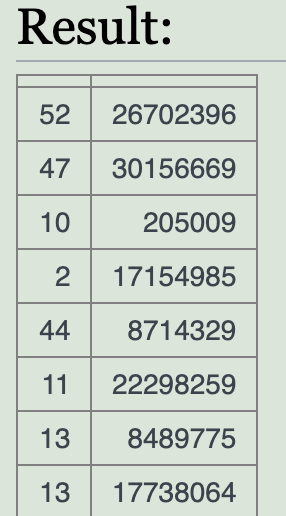

#### group by deal with aggregate count sum kind scenario
- SELECT count(area), sum(area) from world group by  continent having count(area)>=2 and count(area)<=10
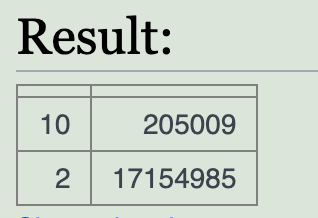

- Select continent , count(1) from world group by continent having count(1)>40
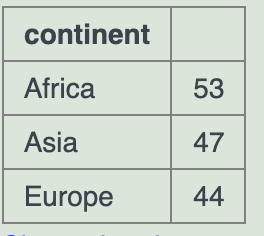

- Select  count(1) from world where continent ='asia'
 not case sensitve and give count
 
- SELECT continent, avg(area) as avgarea FROM world where population between 2831741 and 3000000 group by continent order by avgarea
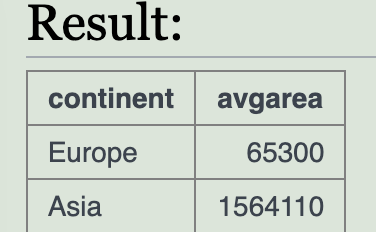

#### by default order by ascending small to large
#### having is to do exclude  records after grouping but where before grouping

SELECT name,continent, avg(area) as avgarea FROM world where population between 2831741 and 3000000 group by continent,name order by avgarea
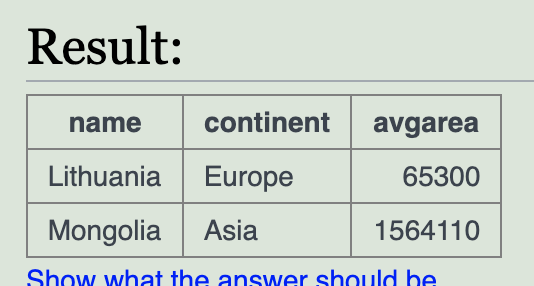

### WITH ... AS¶
On its own, AS is a convenient way to clean up the data returned by your query. It's even more powerful when combined with WITH in what's called a "common table expression".

A common table expression (or CTE) is a temporary table that you return within your query. CTEs are helpful for splitting your queries into readable chunks, and you can write queries against them.

#### reference: Find all the employee whose salary is more than the average salary of all employees.
with temptable(avgarea) as (select avg(area) from world) SELECT top 2 *
        FROM world, temptable 
        WHERE world.area > temptable.avgarea;
        
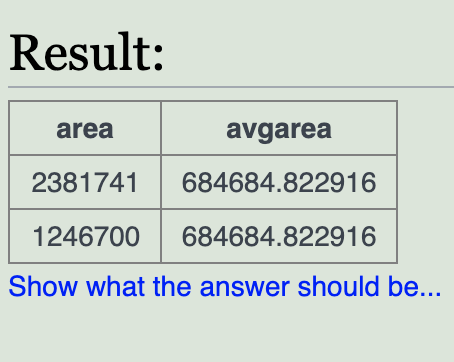

SELECT EXTRACT(MONTH FROM trip_start_timestamp) AS month, 
                               COUNT(1) AS num_trips
                        FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                        WHERE EXTRACT(YEAR FROM trip_start_timestamp) = 2017
                        GROUP BY month
                        ORDER BY month
                        
                        
                        
                        
                        
WITH RelevantRides AS
               (
                   SELECT EXTRACT(HOUR FROM trip_start_timestamp) AS hour_of_day, 
                          trip_miles, 
                          trip_seconds
                   FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                   WHERE trip_start_timestamp > '2017-01-01' AND 
                         trip_start_timestamp < '2017-07-01' AND 
                         trip_seconds > 0 AND 
                         trip_miles > 0
               )
               SELECT hour_of_day, 
                      COUNT(1) AS num_trips, 
                      3600 * SUM(trip_miles) / SUM(trip_seconds) AS avg_mph
               FROM RelevantRides
               GROUP BY hour_of_day
               ORDER BY hour_of_day

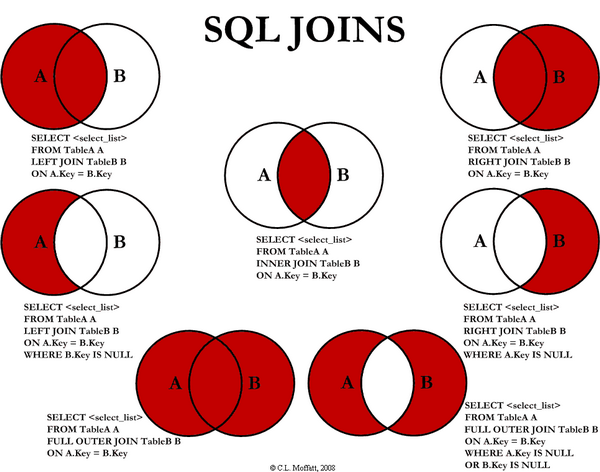